In [1]:
import numpy as np
import numpy.random as np_rand
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import math

# generating matrix with random black points

def fill_matrix(n, d):
    p = np.zeros((n,n), dtype = int)
    k = int(n*n*d)
    for i in range(0,k):
        x, y = np_rand.randint(0,n,(2))
        while p[x,y] == 1:
            x, y = np_rand.randint(0,n,(2))
        p[x,y] = 1
    return p

# energy

def get_close_neighbours(x, y, n):
    l = []
    for x2 in range(x-1, x+2):
        for y2 in range(y-1, y+2):
            if (-1 < x < n 
                and -1 < y < n 
                and (x != x2 or y != y2) 
                and (0 <= x2 < n) 
                and (0 <= y2 < n)):
                l.append((x2, y2))
    return l

def close_energy(points):
    n = len(points)
    sum = 0
    for x in range(0,n):
        for y in range(0,n):
            nlist = get_close_neighbours(x,y,n)
            local_sum = points[x,y]
            for i, j in nlist:
                local_sum += points[i,j]
            if local_sum >= 4:
                local_sum += 1
            elif local_sum >= 6:
                local_sum += 2
            elif local_sum >= 8:
                local_sum += 3
            sum += local_sum
    return sum

def attract_energy(points):
    n = len(points)
    sum = 0
    for x in range(0,n):
        for y in range(0,n):
            nlist = get_close_neighbours(x,y,n)
            local_sum = 0
            for i, j in nlist:
                local_sum += points[i,j]
            if local_sum > 4:
                sum += local_sum
            else:
                sum -= local_sum
    return sum
            
def diag_energy(points):
    n = len(points)
    sum = 0
    for x in range(0,n):
        for y in range(0,n):
            nlist = get_close_neighbours(x,y,n)
            local_sum = 0
            if x % 2 == y % 2:
                local_sum += points[x,y]
                for i, j in nlist:
                    if i % 2 == j % 2:
                        local_sum += points[i,j]
            else:
                if points[x,y] == 0:
                    local_sum += 1
                    for i, j in nlist:
                        if i % 2 != j % 2 and points[i,j] == 0:
                            local_sum += 1
            sum += local_sum
    return sum

def even_energy(points):
    n = len(points)
    sum = 0
    for x in range(0,n):
        for y in range(0,n):
            nlist = get_close_neighbours(x,y,n)
            local_sum = 0
            if x % 2 == 0 and y % 2 == 0:
                local_sum += points[x,y]
            for i, j in nlist:
                if i % 2 == 0 and j % 2 == 0:
                    local_sum += points[i,j]
            sum += local_sum
    return sum

def matrix_center(n):
    a = []
    if n % 2 == 0:
        c1 = n // 2
        a += [(c1,c1),(c1,c1-1),(c1-1,c1),(c1-1,c1-1)]
    else:
        a += [(c1,c1)]
    return a

def taxi_dist(x1, y1, x2, y2):
    return max(abs(x1 - x2), abs(y1 - y2))

def taxi_far_from_center_energy(points):
    n = len(points)
    sum = 0
    c = matrix_center(n)
    for x in range(0,n):
        for y in range(0,n):
            if (points[x,y] > 0):                
                dist_list = []
                for i, j in c:
                   dist_list.append(taxi_dist(x,y,i,j))
                sum += min(dist_list)
    return sum

# schedule functions

def lin_schedule(t_0, k, n):
    a = np.linspace(0,t_0,n)
    return -a[k]+t_0

def exp_schedule(t_0, k, n):
    return t_0*(0.85**k)

def quad_schedule(t_0, k, n):
    return t_0/(1+2*k^2)

# swap functions

def arbit_swap(s, n):
    a = []
    for i in range(0,n):
        copy = s.copy()
        x1, y1 = np_rand.randint(0,len(s)-1,(2))
        x2, y2 = np_rand.randint(0,len(s)-1,(2))
        while (x1 == x2 and y1 == y2) or (s[x1,y1] == 0 and s[x2,y2] == 0):
            x1, y1 = np_rand.randint(0,len(s)-1,(2))
            x2, y2 = np_rand.randint(0,len(s)-1,(2))
        copy[x1,y1], copy[x2,y2] = copy[x2,y2], copy[x1,y1]
        a.append(copy)
    return a

def close_swap(s, n):
    a = []
    for i in range(0,n):
        copy = s.copy()
        x1, y1 = np_rand.randint(0,len(s)-1,(2))
        neib = get_close_neighbours(x1, y1, n)
        neib_i = np_rand.randint(0,len(neib))
        x2, y2 = neib[neib_i]
        copy[x1,y1], copy[x2,y2] = copy[x2,y2], copy[x1,y1]
        a.append(copy)
    return a

# probability

def p(e, e_new, t):
    if t < 1:
        t = 1
    return math.exp(-(e - e_new)/t)

# simulated annealing

def sim_an(s, k_max, t_0, t_1, p, schedule, swap, energy, neighbours_num):
    for i in range(0, 5):
        for k in range(0, k_max):
            t = schedule(t_0, k, k_max)
            a = swap(s, neighbours_num)
            for s_new in a:
                if p(energy(s), energy(s_new), t) >= np_rand.random():
                    s = s_new
            if math.isclose(t_1, t, rel_tol = 0.01):
                break
    return s

In [2]:
n = 8
d = 0.3
s = fill_matrix(n,d)
cmap = clr.ListedColormap(['w', 'k'])

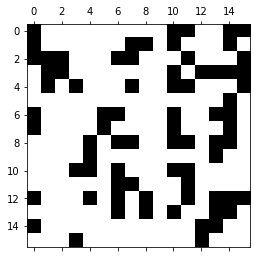

694


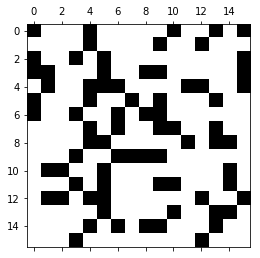

691


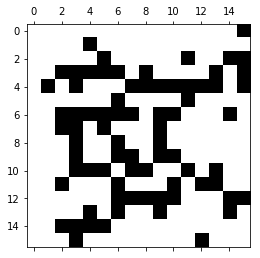

771


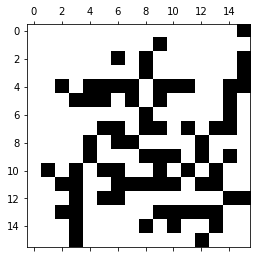

772


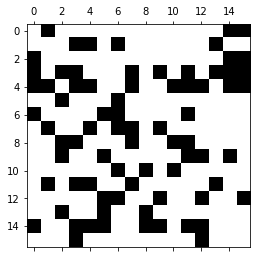

697


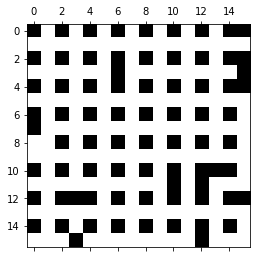

671


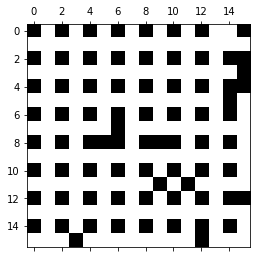

674


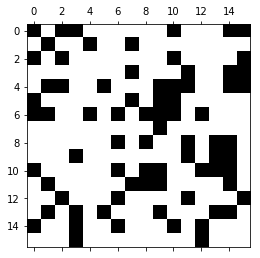

681


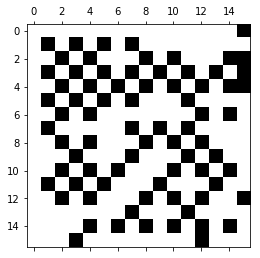

723


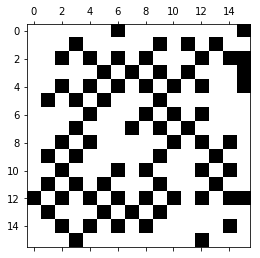

718


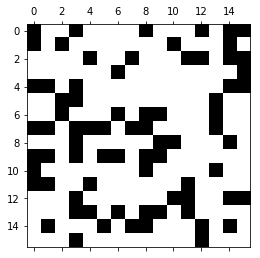

679


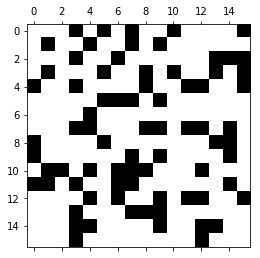

687


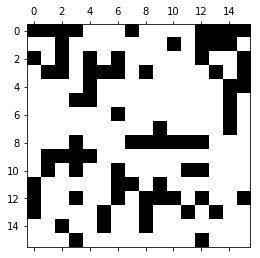

687


In [13]:
energies = [close_energy, even_energy, diag_energy, taxi_far_from_center_energy, attract_energy]
schedules = [lin_schedule, exp_schedule, quad_schedule]
swaps = [arbit_swap, close_swap]

for energy in energies:
    for schedule in schedules:
        for swap in swaps:
            plt.matshow(s, cmap = cmap)
            plt.show()
            print(energy(s))
            s_new = sim_an(s, 500, 1000, 1, p, schedule, swap, energy, 15)
            plt.matshow(s_new, cmap = cmap)
            plt.show()
            print(energy(s_new))

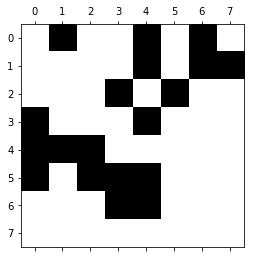

81


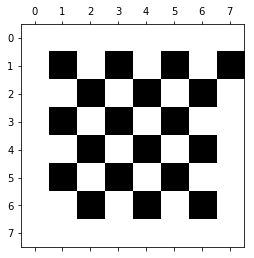

223


In [4]:
energy = diag_energy
schedule = quad_schedule
swap = arbit_swap

plt.matshow(s, cmap = cmap)
plt.show()
print(energy(s))

s_new = sim_an(s, 500, 1000, 1, p, schedule, swap, energy, 15)
plt.matshow(s_new, cmap = cmap)
plt.show()
print(energy(s_new))